In [91]:
#Импортируем нужные библиотеки:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [55]:
"""Initialization of data generator"""
from data_generator import DataGenerator

generator = DataGenerator(test_data=100, train_data=300)

'Initialization of data generator'

In [56]:
"""Get train data"""
generator.generate_train_data()
train_data = generator.get_train_data()

'Get train data'

In [57]:
"""Get test data"""
generator.generate_test_data()
test_data = generator.get_test_data()

'Get test data'

In [58]:
"""Get shapes and examples of generated data"""
print(f'Train: {len(train_data)}, Test: {len(test_data)}')
print(f'Train ex.: {train_data[13]}')
print(f'Test ex.: {test_data[50]}')

'Get shapes and examples of generated data'

Train: 3741, Test: 900
Train ex.: ['3', [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]]
Test ex.: ['0', [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]]


In [60]:
print(list(zip(*train_data)))

[('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'

In [66]:
# restructure data
Y_train, X_train = list(zip(*train_data))
Y_test, X_test = list(zip(*test_data))

Y_train = list(map(int, Y_train))
Y_test = list(map(int, Y_test))

<Figure size 1440x1728 with 0 Axes>

<AxesSubplot:>

(array([375., 374., 374., 374., 374., 374., 374., 374., 748.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Y_train')

<AxesSubplot:>

(array([ 90.,  90.,  90.,  90.,  90.,  90.,  90.,  90., 180.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Y_test')

<AxesSubplot:>

(array([[3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.],
        [3741.]]),
 array([0, 1]),
 <a list of 35 BarContainer objects>)

Text(0.5, 1.0, 'X_train')

<AxesSubplot:>

(array([[900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.],
        [900.]]),
 array([0, 1]),
 <a list of 35 BarContainer objects>)

Text(0.5, 1.0, 'X_test')

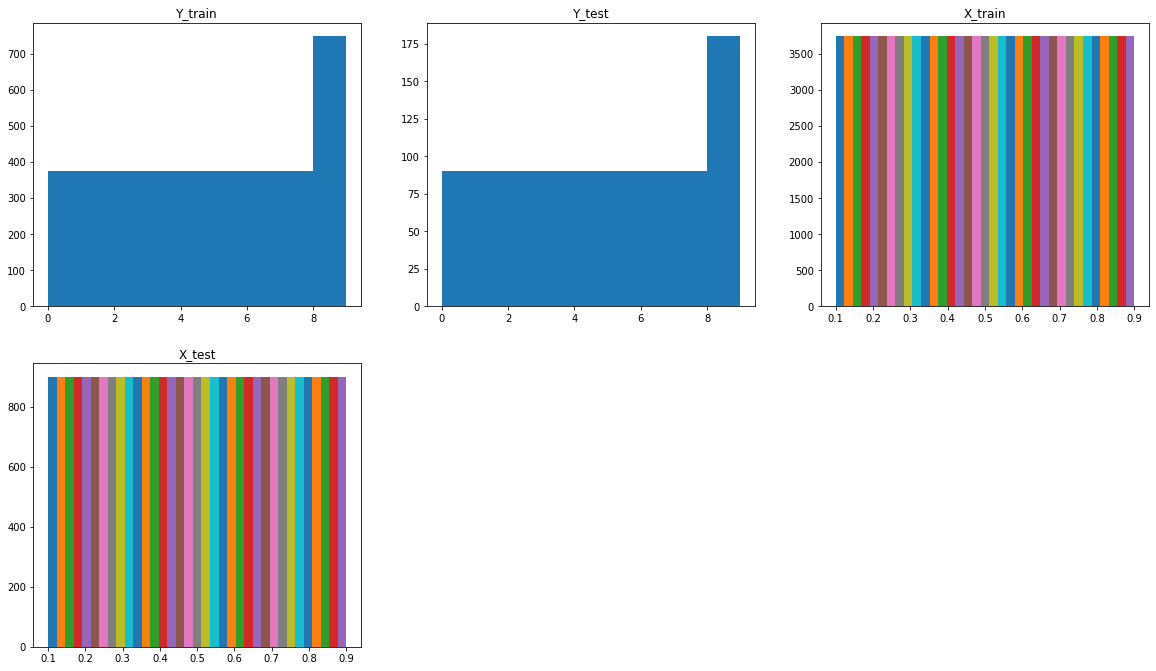

In [77]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot
pyplot.figure(figsize(20, 24))

a = np.array(Y_train)
pyplot.subplot(4, 3, 1)
pyplot.hist(a, bins = [0,1,2,3,4,5,6,7,8,9])
pyplot.title("Y_train")

a = np.array(Y_test)
pyplot.subplot(4, 3, 2)
pyplot.hist(a, bins=[0,1,2,3,4,5,6,7,8,9])
pyplot.title("Y_test")

a = np.array(X_train)
pyplot.subplot(4, 3, 3)
pyplot.hist(a, bins=[0,1])
pyplot.title("X_train")

a = np.array(X_test)
pyplot.subplot(4, 3, 4)
pyplot.hist(a, bins=[0,1])
pyplot.title("X_test")
pyplot.show()

In [92]:
train_data, test_data, train_labels, test_labels = train_test_split(X_train, Y_train, test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

KMeans(n_clusters=3)

0.13891362422083706
              precision    recall  f1-score   support

           0       0.10      0.37      0.16       121
           1       0.22      0.47      0.30       112
           2       0.13      0.52      0.21       112
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00       115
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00       113
           7       0.00      0.00      0.00       108
           8       0.00      0.00      0.00       118
           9       0.00      0.00      0.00       121

    accuracy                           0.14      1123
   macro avg       0.05      0.14      0.07      1123
weighted avg       0.05      0.14      0.07      1123



c:\coding\neural-networks-labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\coding\neural-networks-labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\coding\neural-networks-labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
train_data, test_data, train_labels, test_labels = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=1000, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

SGDClassifier(alpha=0.001, random_state=0)

0.7684772929652716
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        99
           1       0.85      0.82      0.84       121
           2       0.84      0.71      0.77       103
           3       0.76      0.70      0.73       106
           4       0.72      0.55      0.63       105
           5       0.81      0.78      0.79       109
           6       0.83      0.91      0.87       117
           7       0.67      0.94      0.78       114
           8       0.58      0.55      0.57       125
           9       0.89      1.00      0.94       124

    accuracy                           0.77      1123
   macro avg       0.77      0.76      0.76      1123
weighted avg       0.77      0.77      0.76      1123



In [97]:
train_data, test_data, train_labels, test_labels = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
model = linear_model.SGDClassifier(alpha=0.00001, max_iter=1835, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print(scores.mean())

0.7845412535462548


In [124]:
import pandas as pd

train_data = list(zip(Y_train, tuple(map(tuple, X_train))))
test_data = list(zip(Y_test, tuple(map(tuple, X_test))))
df_train = pd.DataFrame(train_data, columns=['target', 'data'])
df_test = pd.DataFrame(test_data, columns=['target', 'data'])

In [125]:
df_train.head()

,target,data
0,0,"(0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, ..."
1,1,"(1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, ..."
2,2,"(0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
3,3,"(0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ..."
4,4,"(0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ..."


In [126]:
df_test.head()

,target,data
0,0,"(1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, ..."
1,1,"(0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, ..."
2,2,"(1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,3,"(0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, ..."
4,4,"(1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


In [127]:
import seaborn as sns
sns.pairplot(df_train[['target','data']], hue='target')

ValueError: No variables found for grid columns.

ValueError: setting an array element with a sequence.

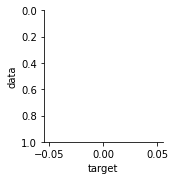

In [128]:
pp = sns.pairplot(data=df_train,
                  x_vars=['target'],
                  y_vars=['data'])